In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.io.fits as fitsio
from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
from importlib import reload
import sys
sys.path.append('/Users/nora/projects/stream_search/code')
import plot_density
reload(plot_density)
import streamlib
reload(streamlib)
import skymap
reload(skymap)
print(skymap.__version__)
import galstreams
reload(galstreams)

0.2.0


<module 'galstreams' from '/Users/nora/miniconda3/envs/py3/lib/python3.7/site-packages/galstreams-1.0.0-py3.7.egg/galstreams/__init__.py'>

In [9]:
mw_streams = galstreams.MWStreams(verbose=False)

In [10]:
plot_density.plot_pretty(figsize=(12,12))

# Filtered Data

In [11]:
import load_data
reload(load_data)
hpxcube, fracdet, modulus = load_data.load_data(survey='DES_Y6', z=0.0001, age=11.0, gmax=23.0)

Reading ../data/DES_Y6_iso_hpxcube_NGC1851.fits.gz...


In [12]:
print(hpxcube.max())

873.0


In [13]:
mw_streams.keys()

dict_keys(['VOD/VSS', 'Monoceros', 'EBS', 'Her-Aq', 'PAndAS', 'Tri-And', 'Tri-And2', 'PiscesOv', 'EriPhe', 'Phoenix', 'WG1', 'WG2', 'WG3', 'WG4', 'Acheron', 'Cocytos', 'Lethe', 'Styx', 'ACS', 'Pal15', 'Eridanus', 'TucanaIII', 'Indus', 'Jhelum', 'Ravi', 'Chenab', 'Elqui', 'Aliqa_Uma', 'Turbio', 'Willka_Yaku', 'Turranburra', 'Wambelong', 'Palca', 'Jet', 'Gaia-1', 'Gaia-2', 'Gaia-3', 'Gaia-4', 'Gaia-5', 'PS1-A', 'PS1-B', 'PS1-C', 'PS1-D', 'PS1-E', 'ATLAS', 'Ophiucus', 'Sangarius', 'Scamander', 'Corvus', '20.0-1', 'Sgr-L10', 'Orphan', 'Pal5', 'GD-1', 'Tri/Pis', 'NGC5466', 'Alpheus', 'Hermus', 'Hyllus', 'Cetus', 'Kwando', 'Molonglo', 'Murrumbidgee', 'Orinoco', 'Phlegethon', 'Slidr', 'Sylgr', 'Ylgr', 'Fimbulthul', 'Svol', 'Fjorm', 'Gjoll', 'Leiptr'])

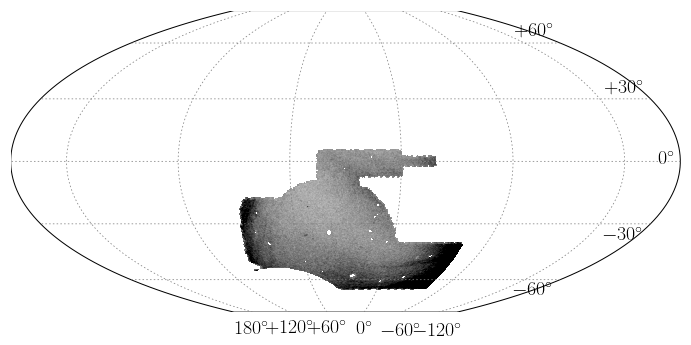

In [14]:
plot_density.plot_pretty(fontsize=20)
reload(plot_density)
mu = 15.4
coords='cel'
lon, lat = 30, -30
center = (lon, lat)
vmin, vmax = 0, 12
sigma = 0.2
proj = 'mbtfpq'
stream = 'ATLAS'

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
smap = plot_density.plot_density(data, 0, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)


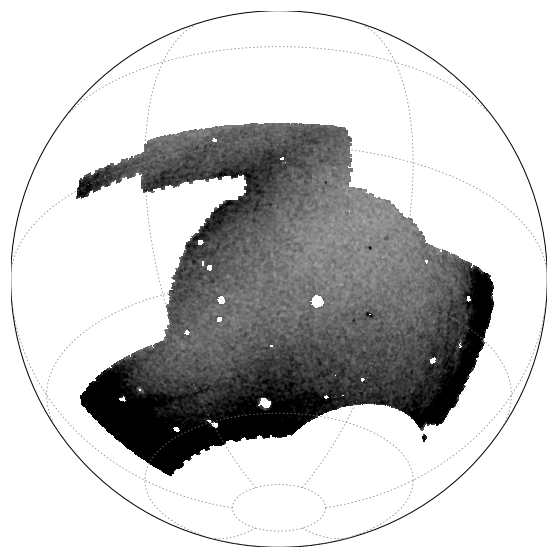

In [15]:
reload(plot_density)
plot_density.plot_pretty()
mu = 16.8
coords='cel'
lon, lat = 30, -30
center = (lon, lat)
vmin, vmax = 0, 9
sigma = 0.2
proj = 'ortho'
stream = 'ATLAS'

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
smap = plot_density.plot_density(data, 0, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)

32.49999999999999 -30.023630299246015 0.002562590687935769


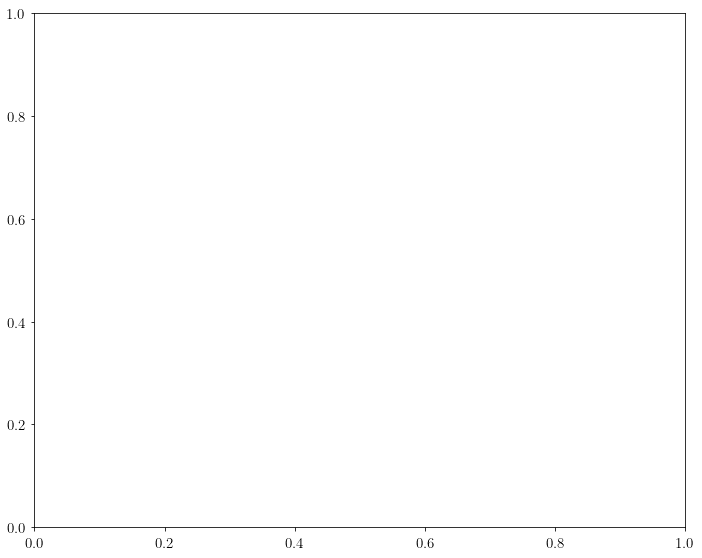

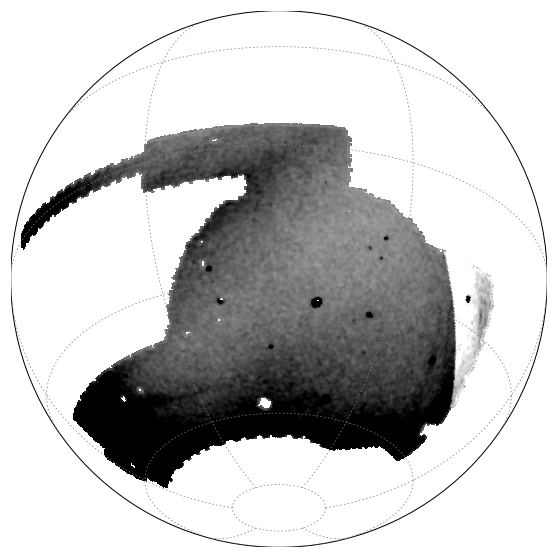

In [18]:
import plot_density_healpy
reload(plot_density_healpy)
reload(plot_density)
plot_density.plot_pretty()
mu = 16.8
coords='cel'
lon, lat = 30, -30
center = (lon, lat)
vmin, vmax = 0, 9
sigma = 0.2
proj = 'ortho'
stream = 'ATLAS'

proj1 = plot_density_healpy.get_ortho_proj(ends=[[30, -30],[35, -30]], half_sky=True)

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
data_unm = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
bkg = plot_density.fit_background(data, center=center, coords=coords, coord_stream=stream, proj=proj, sigma=sigma, deg=5)
bkg.mask = data_unm.mask

smap = plot_density.plot_density(data_unm-bkg, 0, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)



In [ ]:
import plot_density_healpy
reload(plot_density_healpy)
import load_data
reload(load_data)
import streamlib
reload(streamlib)
import healpy as hp
from matplotlib.path import Path
plot_density.plot_pretty(fontsize=20)

proj1 = plot_density_healpy.get_ortho_proj(ends=[[25, -30],[30, -30]], half_sky=True)

# mu = 16.8
for mu in modulus:
    print(mu)

    data = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
    data_unm = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
    bkg1 = plot_density_healpy.fit_bkg(data, proj1, sigma=0.1)
    bkg1.mask = data_unm.mask

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax1, im1 = plot_density_healpy.plot_proj(proj1, data_unm-bkg1, vmin=-2, vmax=2, ax=ax)
    ax1.set_title(r'$m - M = %.1f$' %mu)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    plt.savefig('../plots/DES_hack/DES_Y6_%.1f.png' %mu)
    plt.close('all')
    # xmin, xmax, ymin, ymax = -0.6, 0.8, -0.5, 0.4
    # ax1.set_xlim(xmin, xmax)
    # ax1.set_ylim(ymin, ymax)

27.499999999999996 -30.023630299246005 0.006144773175638218
15.0
15.1
15.2
15.299999999999999
15.399999999999999
15.499999999999998
15.599999999999998
15.699999999999998
15.799999999999997
15.899999999999997


In [ ]:
reload(plot_density)
smap = plot_density.plot_density(data, bkg, center=(120,30), vmax=18)
smap = plot_density.plot_density(data_north, bkg, center=(120,30), vmax=20, smap=smap)
# smap = plot_density.plot_density(data_ps1, bkg, center=(120,30), vmax=20, smap=smap)

# smap = plot_density.plot_density(data_ps1, bkg, center=(120,30), vmax=20)
smap = plot_density.plot_density(data, bkg, center=(120,30), vmax=20)
smap = plot_density.plot_density(data_north, bkg, center=(120,30), vmax=20, smap=smap)

# plot_density.plot_stream_list(smap, ['GD-1'])
plot_density.plot_streams(smap, mu, dmu=100)
# plot_density.plot_dwarfs_globs(smap, data, mu, 50, coords=coords, coord_stream=stream)

# Healpy

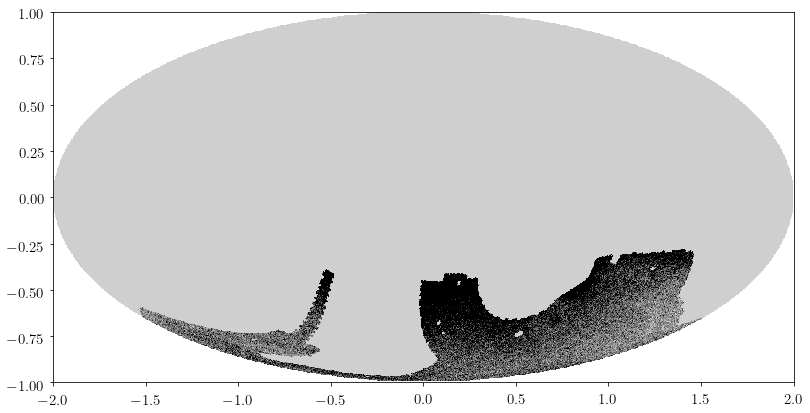

In [31]:
import healpy as hp

mu = 16.0
hpxmap = hpxcube[:,np.argmin(np.abs(mu-modulus))]

nside = hp.npix2nside(hpxmap.shape[0])
func = lambda x, y, z: hp.vec2pix(nside, x, y, z)

proj = hp.projector.MollweideProj(xsize=1024, rot=[266.4, -28.9, 59.0])
img = proj.projmap(hpxmap, func)


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.imshow(img, origin='bottom', vmin=-5, vmax=12, cmap='Greys', extent=proj.get_extent())
plt.show()

## ATLAS

In [19]:
import astropy.coordinates as coord
import gala.coordinates as gc

def zyx_euler_from_endpoints(lon1, lat1, lon2, lat2):
    c1 = coord.SkyCoord(lon1*u.deg, lat1*u.deg)
    c2 = coord.SkyCoord(lon2*u.deg, lat2*u.deg)
    fr = gc.GreatCircleICRSFrame.from_endpoints(c1, c2)
    origin = fr.realize_frame(coord.UnitSphericalRepresentation(0*u.deg, 0*u.deg))

    gc_icrs = origin.transform_to(coord.ICRS)
    R = gc.greatcircle.reference_to_greatcircle(coord.ICRS, fr)
    psi = -np.degrees(np.arctan2(R[2,1], R[2,2]))
   
    return [gc_icrs.ra.degree, gc_icrs.dec.degree, psi]

def get_vscale(img, q=[5, 95]):
    from astropy.stats import sigma_clip
   
    _tmp = img.ravel()
    stdfunc = lambda x,axis: 1.5*np.median(np.abs(x-np.median(x,axis=axis)), axis=axis)
    _tmp_clipped = sigma_clip(_tmp[_tmp != 0], stdfunc=stdfunc)
   
    return np.percentile(_tmp_clipped[_tmp_clipped > 0], q)

In [20]:
# xy = proj.ang2xy(ra, dec, lonlat=True)

reload(streamlib)
atlas = streamlib.load_stream.get_stream('ATLAS')
aliqa_uma = streamlib.load_stream.get_stream('Aliqa Uma')
phoenix = streamlib.load_stream.get_stream('Phoenix')
print(phoenix['ends'])
# print(mw_streams['Phoenix'].end_f, mw_streams['Phoenix'].end_o)
stream = mw_streams['Phoenix']
print([[stream.end_o.ra.deg, stream.end_o.dec.deg], [stream.end_f.ra.deg, stream.end_f.dec.deg]])

# print(aliqa_uma['ends'])
# print(atlas['ends'])

ends = atlas['ends']
# ends = [atlas['ends'][0], aliqa_uma['ends'][1]]
print(ends)

print([[19.465113557599395, -26.584615187212712], [31.04372386479431, -32.98118501241838]])
# 25.068645522575792 -29.909239371068143 -42.37229980876416
# m-M = 16.0

# phi, theta, psi = streamlib.results.euler_angles(atlas['ends'][0][0], atlas['ends'][0][1], atlas['ends'][1][0], atlas['ends'][1][1])
phi, theta, psi = zyx_euler_from_endpoints(ends[0][0], ends[0][1], ends[1][0], ends[1][1])
# print(phi, theta, psi)

[[20.08, -55.29], [27.88, -42.69]]
[[20.082460505880235, -56.996486198871246], [27.0343557428393, -45.05609871166725]]
[[9.29, -20.9], [30.71, -33.19]]
[[19.465113557599395, -26.584615187212712], [31.04372386479431, -32.98118501241838]]


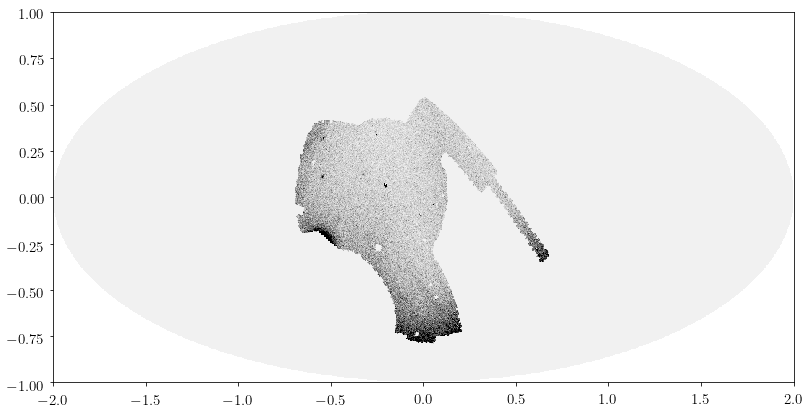

In [21]:
import healpy as hp

mu = 16.0
hpxmap = np.sum(hpxcube[:,np.argmin(np.abs(mu-modulus))-5:np.argmin(np.abs(mu-modulus))+5], axis=1)

nside = hp.npix2nside(hpxmap.shape[0])
func = lambda x, y, z: hp.vec2pix(nside, x, y, z)

proj = hp.projector.MollweideProj(xsize=1024, rot=[phi, theta, psi])
img = proj.projmap(hpxmap, func)


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.imshow(img, origin='bottom', vmin=-10, vmax=80, cmap='Greys', extent=proj.get_extent())
plt.show()

m-M = 17.0
4.6273054078893594e-05 6.872824148511057


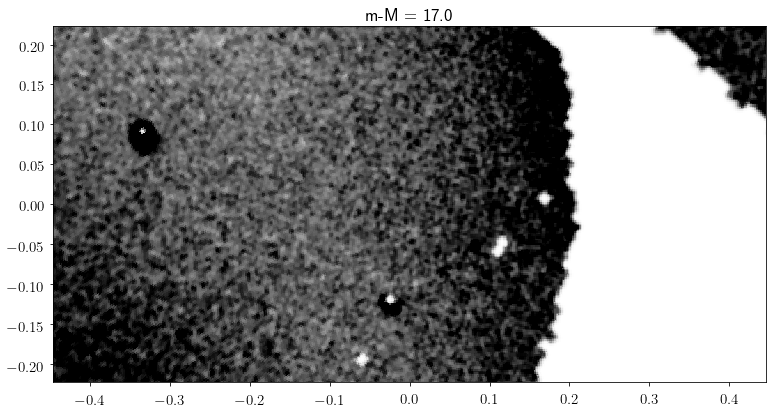

In [22]:
from healpy.sphtfunc import smoothing
dmu = 0.1
# for mu in np.arange(15, 18+dmu/2., dmu):
for mu in [17.0]:
    print('m-M = %.1f' %mu)
    hpxmap = hpxcube[:,np.argmin(np.abs(mu-modulus))]
    nside = hp.npix2nside(hpxmap.shape[0])
    func = lambda x, y, z: hp.vec2pix(nside, x, y, z)

    hpxmap_smooth = hp.smoothing(hpxmap, sigma=np.radians(0.12), verbose=False)
    proj = hp.projector.GnomonicProj(xsize=1024, ysize=512, rot=[phi, theta, psi], reso=3.0)
    img = proj.projmap(hpxmap_smooth, func)

    vmin, vmax = get_vscale(img, q=[1, 90])
    print(vmin, vmax)
    
    fig, ax = plt.subplots(1,1, figsize=(12, 6))
    ax.imshow(img, origin='bottom', vmin=vmin, vmax=vmax, cmap='Greys', extent=proj.get_extent())
    plt.title('m-M = %.1f' %mu)
    
#     plt.savefig('../plots/atlas/atlas_aliqa_uma_%.1f.png' %(mu))
#     plt.close('all')
    
# plt.show()

# General

16.505149978319906 16.505149978319906
[[19.465113557599395, -26.584615187212712], [31.04372386479431, -32.98118501241838]]
25.068645522575792 -29.909239371068143 -32.594334291997164
m-M = 16.5
vmin, vmax =  5.343455682815801e-06 7.120588414686045


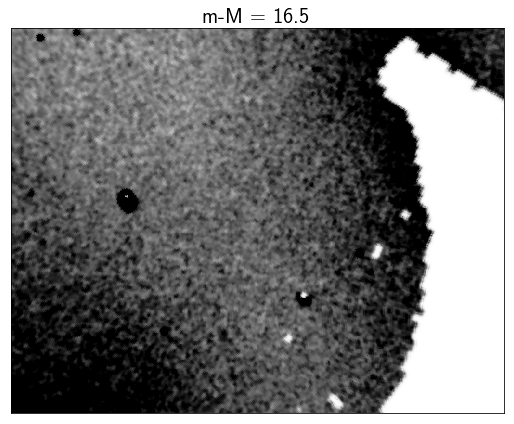

In [23]:
# %matplotlib notebook
%matplotlib inline
import plot_density_healpy
reload(plot_density_healpy)

stream = 'ATLAS'
mu = plot_density.dist2mod(mw_streams[stream].Rhel[0])

ax, proj = plot_density_healpy.plot_stream(hpxcube, modulus, stream, mu_min=mu, mu_max=mu, save=False)

# NGC 1851

In [15]:
ra_ngc1851, dec_ngc1851 =  78.528, -40.047

In [16]:
mu_ngc1851 = plot_density.dist2mod(12.1)
print(mu_ngc1851)

15.41392685158225


In [17]:
import filter_data
iso = filter_data.isochrone_factory('Dotter', survey='DES')

In [18]:
iso.feh2z(-1.1)

0.0011792622716894794

In [19]:
reload(load_data)
hpxcube1, fracdet1, modulus1 = load_data.load_data(survey='DES_Y6', z=0.0001, age=11.0, gmax=23.0)

Reading ../data/DES_Y6_iso_hpxcube_NGC1851.fits.gz...


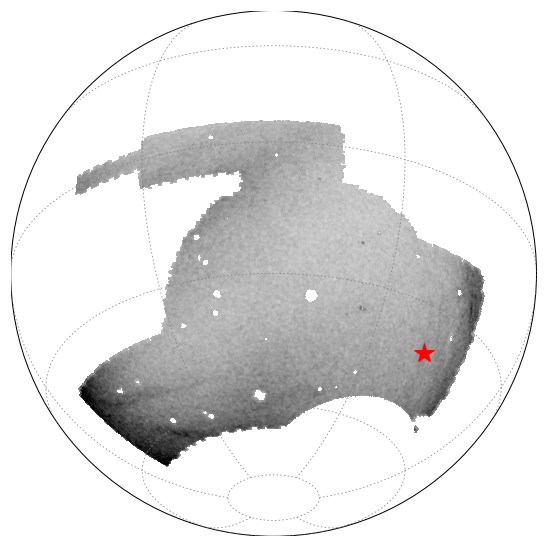

In [20]:
reload(plot_density)
mu = 16.8
coords='cel'
lon, lat = 30, -30
center = (lon, lat)
vmin, vmax = 0, 18
sigma = 0.2
proj = 'ortho'
stream = 'ATLAS'

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
smap = plot_density.plot_density(data, 0, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)

x, y = smap(ra_ngc1851, dec_ngc1851)
smap.plot(x, y, 'r*', ms=20)

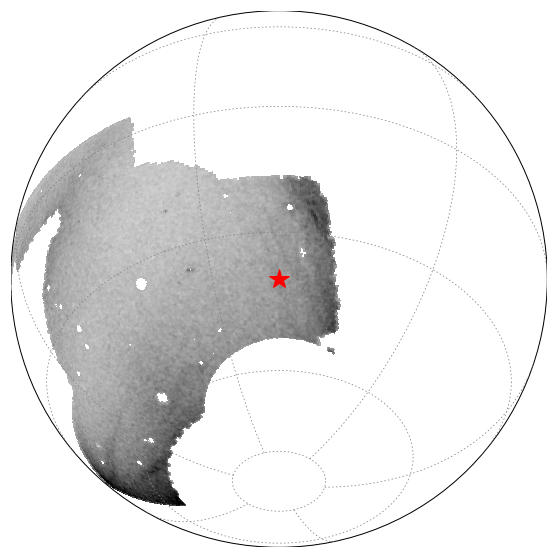

In [21]:
plot_density.plot_pretty(fontsize=15)
reload(plot_density)

mu = 16.8
coords='cel'
lon, lat = ra_ngc1851, dec_ngc1851
center = (lon, lat)
vmin, vmax = 0, 18
sigma = 0.2
proj = 'ortho'

data = plot_density.prepare_hpxmap(mu, hpxcube, fracdet, modulus, clip=100, plane=False, center=False, sgr=False, bmax=25, cmax=40, sigma=sigma)
smap = plot_density.plot_density(data, 0, center=center, vmin=vmin, vmax=vmax, coords=coords, proj=proj, xsize=1000, smooth=sigma)

x, y = smap(ra_ngc1851, dec_ngc1851)
smap.plot(x, y, 'r*', ms=20)

Using ends =  [[85, -36], [82, -46]]
83.61410502152607 -41.0096670163826 77.33552208811476


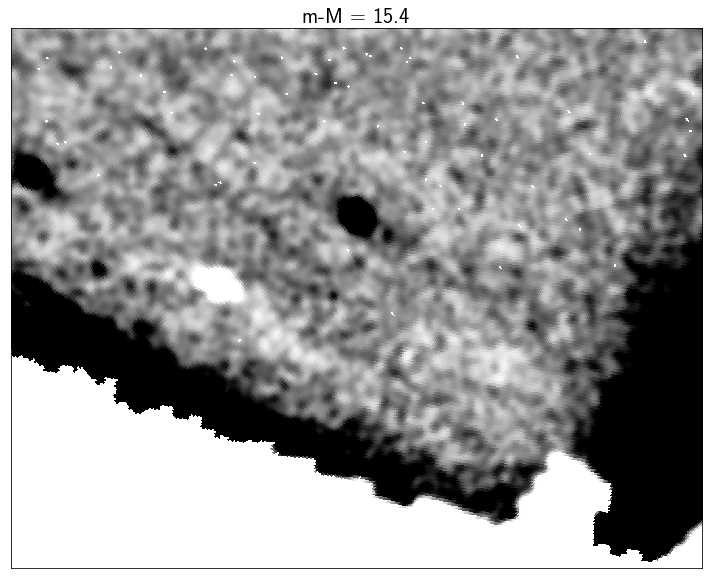

In [27]:
# %matplotlib notebook
%matplotlib inline
import plot_density_healpy
reload(plot_density_healpy)

stream = 'NGC 1851'
mu = mu_ngc1851

import plot_density_healpy
proj1 = plot_density_healpy.get_gnomonic_proj(stream=None, ends=[[85, -36], [82, -46]], rot=None, xsize=1024, ysize=800, reso=2.0)

data = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
data_unm = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
bkg1 = plot_density_healpy.fit_bkg(data, proj1, sigma=0.1)
bkg1.mask = data_unm.mask

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax1, im1 = plot_density_healpy.plot_proj(proj1, data_unm-bkg1, vmin=-2, vmax=2, ax=ax)

plt.title('m-M = %.1f' % mu, fontsize=22)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

x, y = proj.ang2xy(ra_ngc1851, dec_ngc1851, lonlat=True)
# plt.plot(x, y, 'r*', ms=20)

# Eri-Phe

44.0 -54.004149879915154 0.002037912583069828


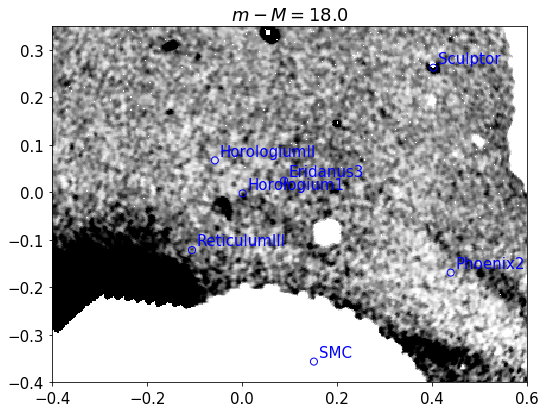

In [42]:
reload(plot_density_healpy)

plot_density.plot_pretty(fontsize=15, tex=False)

proj1 = plot_density_healpy.get_ortho_proj(ends=[[43,-54],[45,-54]], half_sky=True)
mu = 18.0

data = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
data_unm = plot_density_healpy.prepare_data(mu, hpxcube, modulus, fracdet, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
bkg = plot_density_healpy.fit_bkg(data, proj1, sigma=0.1)
bkg.mask = data_unm.mask
    
ax1, im1 = plot_density_healpy.plot_proj(proj1, data_unm-bkg, vmin=-1.5, vmax=1.5)
ax1.set_title(r'$m - M = %.1f$' %mu)
xmin, xmax, ymin, ymax = -0.4, 0.6, -0.4, 0.35
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)

plot_density_healpy.plot_dwarfs_gcs(ax1, proj1, 19.5, dmu=0.5)

ax1.plot(proj1.ang2xy(44, -54), 'r*')



In [35]:
dwarfs_globs = fitsio.open('../data/MW_dwarfs_globs.fits')[1].data

In [37]:
sel = (dwarfs_globs['ra'] > 40) & (dwarfs_globs['ra'] < 50) & (dwarfs_globs['dec'] > -60) & (dwarfs_globs['dec'] < -50)

In [38]:
dwarfs_globs[sel]

FITS_rec([('HorologiumII', 49.13375   , -50.01805556, 19.46      , 77.98301105, 9.999e+00, 2.09),
          ('Horologium1', 43.88208333, -54.11888889, 19.5       , 79.43282347, 9.999e+00, 1.31),
          ('NGC 1261', 48.068     , -55.216     , 16.06093802, 16.3       , 1.000e+20, 6.  )],
         dtype=(numpy.record, [('name', 'S21'), ('ra', '>f8'), ('dec', '>f8'), ('DM', '>f8'), ('dist', '>f8'), ('EBV', '>f8'), ('r_h', '>f8')]))